In [1]:
# Importing Libraries
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt  
import ast

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)


<Axes: ylabel='count'>

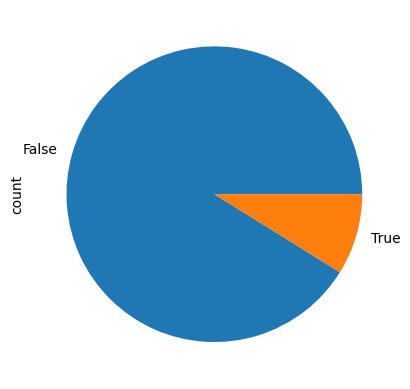

In [2]:
df['job_work_from_home'].value_counts().plot(kind='pie')

<Axes: ylabel='count'>

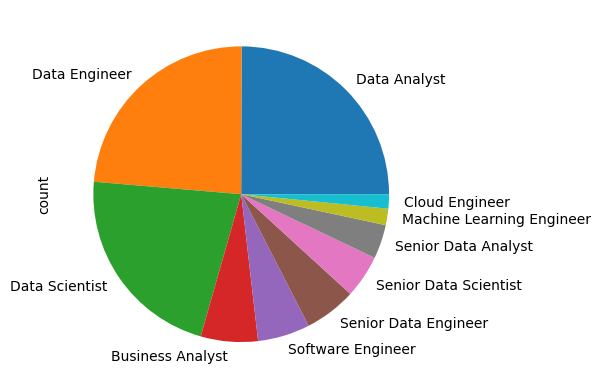

In [3]:
df['job_title_short'].value_counts().plot(kind='pie')

Text(0.5, 1.0, 'Job is Remote')

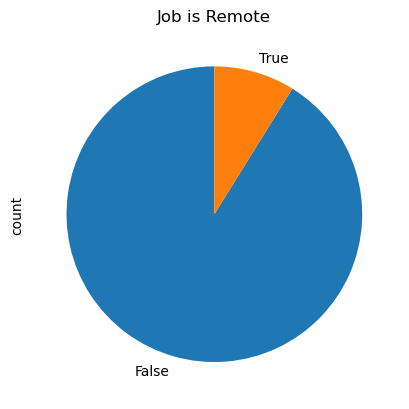

In [4]:
# Starts the pie chart in the center
df['job_work_from_home'].value_counts().plot(kind='pie', 
                                             startangle=90)
plt.title('Job is Remote')

Text(0.5, 1.0, 'Job is Remote')

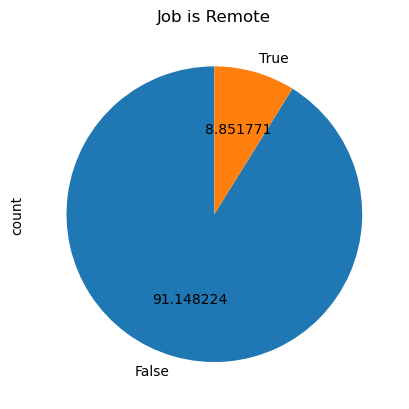

In [5]:
# Shoes the percent of each Pie Portion
df['job_work_from_home'].value_counts().plot(kind='pie', 
                                             startangle=90,
                                             autopct='%1f')
plt.title('Job is Remote')

Text(0.5, 1.0, 'Job is Remote')

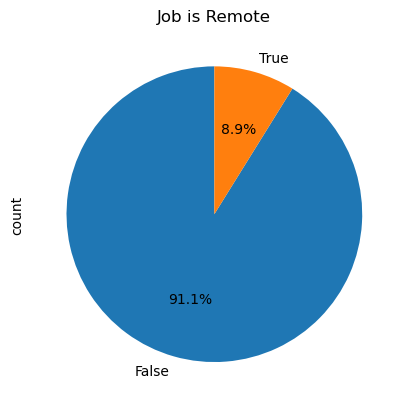

In [6]:
# Shoes the percent with 1 decimal of each Pie Portion
df['job_work_from_home'].value_counts().plot(kind='pie', 
                                             startangle=90,
                                             autopct='%1.1f%%')
plt.title('Job is Remote')

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 785741 entries, 0 to 785740
Data columns (total 17 columns):
 #   Column                 Non-Null Count   Dtype         
---  ------                 --------------   -----         
 0   job_title_short        785741 non-null  object        
 1   job_title              785740 non-null  object        
 2   job_location           784696 non-null  object        
 3   job_via                785733 non-null  object        
 4   job_schedule_type      773074 non-null  object        
 5   job_work_from_home     785741 non-null  bool          
 6   search_location        785741 non-null  object        
 7   job_posted_date        785741 non-null  datetime64[ns]
 8   job_no_degree_mention  785741 non-null  bool          
 9   job_health_insurance   785741 non-null  bool          
 10  job_country            785692 non-null  object        
 11  salary_rate            33067 non-null   object        
 12  salary_year_avg        22003 non-null   floa

<Axes: ylabel='count'>

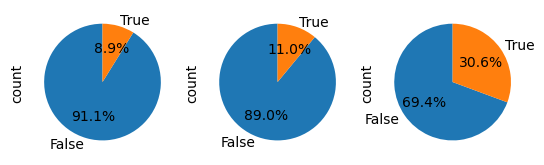

In [8]:
fig, ax = plt.subplots(1, 3)

df['job_work_from_home'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=ax[0])
df['job_health_insurance'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=ax[1])
df['job_no_degree_mention'].value_counts().plot(kind='pie', startangle=90, autopct='%1.1f%%', ax=ax[2])

In [9]:
dict_columns = {
    'job_work_from_home': 'Work From Home',
    'job_health_insurance': 'Health Insurance',
    'job_no_degree_mention': 'Degree Req'
}

for i, (column, title) in enumerate(dict_columns.items()):
    print(i, column, title)

0 job_work_from_home Work From Home
1 job_health_insurance Health Insurance
2 job_no_degree_mention Degree Req


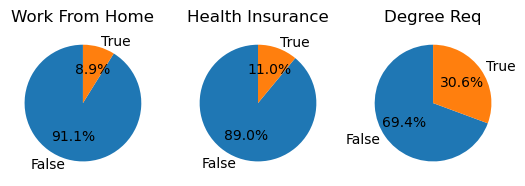

In [10]:
fig, ax = plt.subplots(1, 3)


for i, (column, title) in enumerate(dict_columns.items()):
    ax[i].pie(df[column].value_counts(),startangle=90, autopct='%1.1f%%', labels=['False', 'True'])
    ax[i].set_title(title)

plt.show()

In [11]:
j_titles_filter = ['Data Analyst', 'Data Scientist', 'Data Engineer']

df_j_titles = df[df['job_title_short'].isin(j_titles_filter)].copy()


In [12]:
df_j_titles

,job_title_short,job_title,job_location,job_via,job_schedule_type,job_work_from_home,search_location,job_posted_date,job_no_degree_mention,job_health_insurance,job_country,salary_rate,salary_year_avg,salary_hour_avg,company_name,job_skills,job_type_skills
1,Data Analyst,Data Analyst,"Guadalajara, Jalisco, Mexico",via BeBee México,Full-time,False,Mexico,2023-01-14 13:18:07,False,False,Mexico,None,NaN,NaN,Hewlett Packard Enterprise,"[r, python, sql, nosql, power bi, tableau]","{'analyst_tools': ['power bi', 'tableau'], 'pr..."
2,Data Engineer,"Data Engineer/Scientist/Analyst, Mid or Senior...","Berlin, Germany",via LinkedIn,Full-time,False,Germany,2023-10-10 13:14:55,False,False,Germany,None,NaN,NaN,ALPHA Augmented Services,"[python, sql, c#, azure, airflow, dax, docker,...","{'analyst_tools': ['dax'], 'cloud': ['azure'],..."
3,Data Engineer,LEAD ENGINEER - PRINCIPAL ANALYST - PRINCIPAL ...,"San Antonio, TX",via Diversity.com,Full-time,False,"Texas, United States",2023-07-04 13:01:41,True,False,United States,None,NaN,NaN,Southwest Research Institute,"[python, c++, java, matlab, aws, tensorflow, k...","{'cloud': ['aws'], 'libraries': ['tensorflow',..."
4,Data Engineer,Data Engineer- Sr Jobs,"Washington, DC",via Clearance Jobs,Full-time,False,Sudan,2023-08-07 14:29:36,False,False,Sudan,None,NaN,NaN,Kristina Daniel,"[bash, python, oracle, aws, ansible, puppet, j...","{'cloud': ['oracle', 'aws'], 'other': ['ansibl..."
5,Data Engineer,GCP Data Engineer,Anywhere,via ZipRecruiter,Contractor and Temp work,True,Georgia,2023-11-07 14:01:59,False,False,United States,None,NaN,NaN,smart folks inc,"[python, sql, gcp]","{'cloud': ['gcp'], 'programming': ['python', '..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
785730,Data Engineer,"Data Center Engineering Operations Engineer , ...","Bangkok, Thailand",melalui LinkedIn,Pekerjaan tetap,False,Thailand,2023-03-12 06:37:47,False,False,Thailand,None,NaN,NaN,Amazon Web Services (AWS),"[excel, word, outlook]","{'analyst_tools': ['excel', 'word', 'outlook']}"
785731,Data Engineer,Data Engineer,"Overland Park, Kansas, Amerika Serikat",melalui LinkedIn,Pekerjaan tetap,False,Sudan,2023-03-12 06:32:17,False,False,Sudan,None,NaN,NaN,Shamrock Trading Corporation,"[nosql, mongodb, mongodb, python, elasticsearc...","{'analyst_tools': ['excel'], 'cloud': ['aws', ..."
785732,Data Engineer,Data Engineer (f/m/d),"Heidelberg, Jerman",melalui Top County Careers,Pekerjaan tetap,False,Germany,2023-03-13 06:18:59,False,False,Germany,None,NaN,NaN,Heidelberg Materials,"[python, c#, java, scala, sql, postgresql, sql...","{'cloud': ['azure', 'databricks'], 'databases'..."
785737,Data Analyst,CRM Data Analyst,"Bad Rodach, Jerman",melalui BeBee Deutschland,Pekerjaan tetap,False,Germany,2023-03-12 06:18:18,False,False,Germany,None,NaN,NaN,HABA FAMILYGROUP,"[sas, sas, sql, excel]","{'analyst_tools': ['sas', 'excel'], 'programmi..."


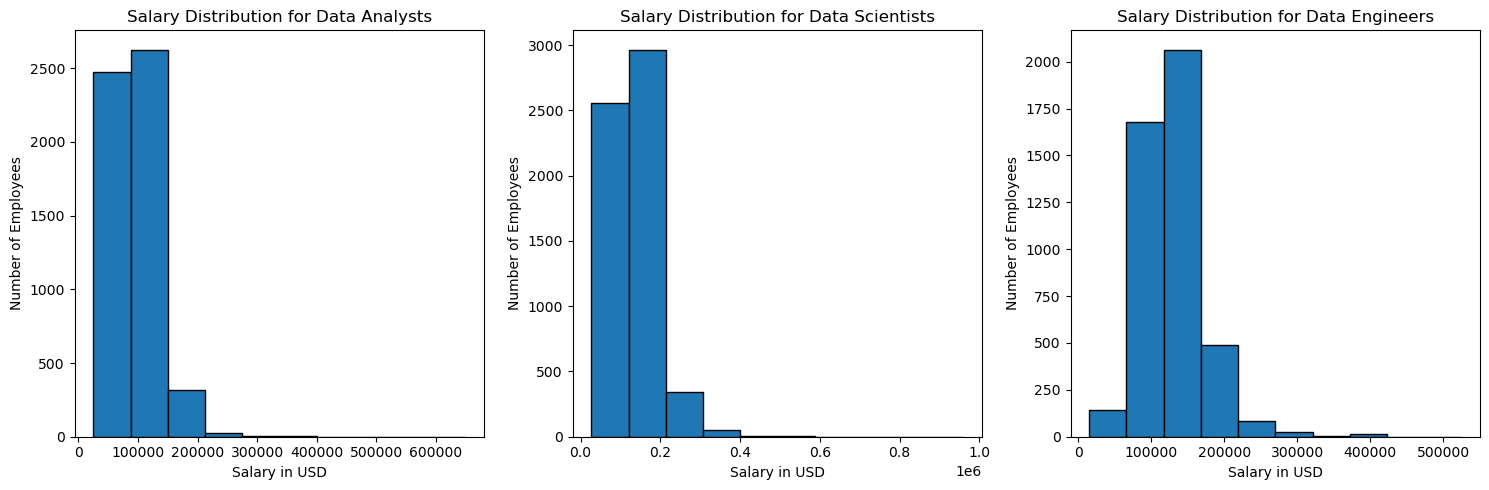

In [33]:
# Using a dictionary for iteration and potential plotting ---
dict_j_titles_for_plotting = {
    'Data Analyst': 'Salary Distribution for Data Analysts',
    'Data Scientist': 'Salary Distribution for Data Scientists',
    'Data Engineer': 'Salary Distribution for Data Engineers'
}

fig, axes = plt.subplots(1, 3, figsize=(15, 5)) # Adjust figsize as needed

for i, (job_title_name, plot_title) in enumerate(dict_j_titles_for_plotting.items()):
    if i < len(axes): # Ensure we don't go out of bounds
        ax = axes[i]

        # Filter the DataFrame for the current job title
        df_j_title_subset = df[df['job_title_short'] == job_title_name].copy()

        # Now you can use df_j_title_subset for your plot
        # Example: Plotting a histogram of salaries for each job title
        if not df_j_title_subset.empty:
            ax.hist(df_j_title_subset['salary_year_avg'],edgecolor='black')
            ax.set_title(plot_title)
            ax.set_xlabel('Salary in USD')
            ax.set_ylabel('Number of Employees')

plt.tight_layout()
plt.show()